# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 82s 0us/step


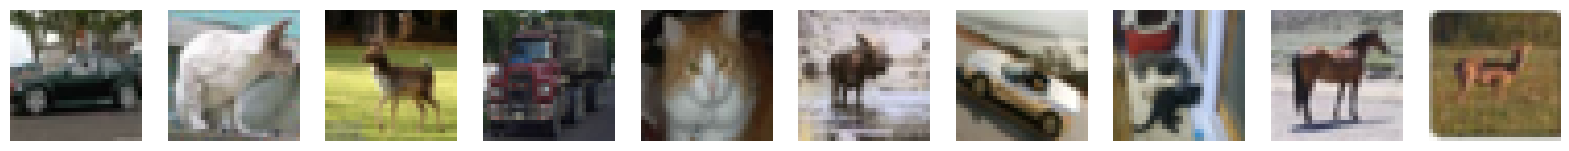

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images by scaling the pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class labels (y_train, y_test) to one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Plot a few random images from the training set
def plot_random_images():
    fig, axes = plt.subplots(1, 10, figsize=(20, 2))
    for i in range(10):
        random_idx = np.random.randint(0, len(x_train))
        axes[i].imshow(x_train[random_idx])
        axes[i].axis('off')
    plt.show()

# Call the function to display random images
plot_random_images()

# Explanation of Code:
Loading the Dataset: The CIFAR-10 dataset is loaded using cifar10.load_data(), splitting into training and testing sets.
Normalization: The pixel values, initially in the range [0, 255], are normalized to [0, 1] to improve model training performance.
One-Hot Encoding: The labels (y_train, y_test) are converted from scalar form to one-hot encoded format using to_categorical, as this is typically required for classification tasks.
Plotting Random Images: A function plot_random_images() is defined to display 10 random images from the training set.

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [3]:
from keras.backend import clear_session
clear_session()

In [4]:
# Importing necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Softmax

# Define the CNN model
model = Sequential()

# Add a convolutional layer with a 3x3 filter, 32 filters, and input shape (32, 32, 3)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Add a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Add a dense layer with 100 units
model.add(Dense(100, activation='relu'))

# Add the output classification layer with softmax activation for 10 classes
model.add(Dense(10, activation='softmax'))

# Print model summary
model.summary()


C:\Users\mktmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

#
Conv2D Layer: A convolutional layer with 32 filters, each of size 3x3, and the input shape is specified as (32, 32, 3) (the shape of a CIFAR-10 image).
MaxPooling2D Layer: After the convolution, a max-pooling layer is applied to downsample the feature maps.
Flatten Layer: This flattens the 2D feature maps into a 1D vector, which is then passed to the dense layers.
Dense Layer (100 units): A fully connected layer with 100 units and ReLU activation.
Output Layer: A dense layer with 10 units (for 10 classes) and softmax activation for classification.

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [5]:
# Importing necessary libraries
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Compile the model
model.compile(optimizer=SGD(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model for 50 epochs with a batch size of 512
history = model.fit(x_train, y_train, 
                    epochs=50, 
                    batch_size=512, 
                    validation_data=(x_test, y_test))


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.1796 - loss: 2.2547 - val_accuracy: 0.2340 - val_loss: 2.1292
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.2715 - loss: 2.0893 - val_accuracy: 0.3229 - val_loss: 1.9985
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.3077 - loss: 1.9769 - val_accuracy: 0.3247 - val_loss: 1.9301
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.3306 - loss: 1.9201 - val_accuracy: 0.3156 - val_loss: 1.9073
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.3421 - loss: 1.8845 - val_accuracy: 0.3501 - val_loss: 1.8598
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.3587 - loss: 1.8473 - val_accuracy: 0.3527 - val_loss: 1.8372
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.3671 - loss: 1.8197 - val_accuracy: 0.3739 - val_loss: 1.7973
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.3788 - loss: 1.7868 - val_accuracy: 0.3798 - v

*   Plot the cross entropy loss curve and the accuracy curve

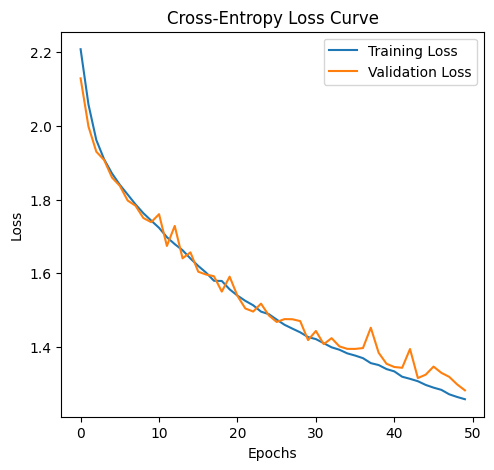

In [7]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Assuming 'history' is the output from model.fit() which contains loss and accuracy history

# Plotting the Cross-Entropy Loss Curve
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Cross-Entropy Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the Accuracy Curve
# Plot the training and validation acc


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [10]:
# Import necessary functions
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Clear any existing session to free up memory
clear_session()

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the VGG-like model architecture
model = Sequential()

# Stack two Conv2D layers with 32 filters of size 3x3 and same padding
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

# Add a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from convolutional layers
model.add(Flatten())

# Add a dense layer with 128 units
model.add(Dense(128, activation='relu'))

# Add the output classification layer (for 10 classes)
model.add(Dense(10, activation='softmax'))

# Compile the model using SGD, categorical crossentropy, and accuracy metric
model.compile(optimizer=SGD(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model for 50 epochs with a batch size of 512
history = model.fit(x_train, y_train, 
                    epochs=50, 
                    batch_size=512, 
                    validation_data=(x_test, y_test))




Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 182ms/step - accuracy: 0.1078 - loss: 2.2784 - val_accuracy: 0.1752 - val_loss: 2.2136
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 182ms/step - accuracy: 0.2245 - loss: 2.1685 - val_accuracy: 0.2959 - val_loss: 2.0175
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - accuracy: 0.2956 - loss: 2.0008 - val_accuracy: 0.2962 - val_loss: 1.9714
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 186ms/step - accuracy: 0.3107 - loss: 1.9472 - val_accuracy: 0.3155 - val_loss: 1.9529
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 179ms/step - accuracy: 0.3370 - loss: 1.8805 - val_accuracy: 0.3296 - val_loss: 1.8902
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 181ms/step - accuracy: 0.3515 - loss: 1.8402 - val_accuracy: 0.3619 - val_loss: 1.8091
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 190ms/step - accuracy: 0.3699 - loss: 1.7914 - val_accuracy: 0.3646 - val_loss: 1.7786
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - accuracy: 0.3785 - loss: 1.7656 - val_accu

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [12]:
# Importing necessary libraries
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model for 50 epochs with a batch size of 512
history = model.fit(x_train, y_train, 
                    epochs=50, 
                    batch_size=512, 
                    validation_data=(x_test, y_test))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 194ms/step - accuracy: 0.5778 - loss: 1.2015 - val_accuracy: 0.5758 - val_loss: 1.1975
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 184ms/step - accuracy: 0.6117 - loss: 1.1048 - val_accuracy: 0.5863 - val_loss: 1.1808
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 193ms/step - accuracy: 0.6301 - loss: 1.0536 - val_accuracy: 0.6078 - val_loss: 1.1124
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 191ms/step - accuracy: 0.6548 - loss: 0.9866 - val_accuracy: 0.6185 - val_loss: 1.0777
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 186ms/step - accuracy: 0.6811 - loss: 0.9109 - val_accuracy: 0.6208 - val_loss: 1.0719
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 190ms/step - accuracy: 0.7018 - loss: 0.8614 - val_accuracy: 0.6300 - val_loss: 1.0557
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 191ms/step - accuracy: 0.7183 - loss: 0.8168 - val_accuracy: 0.6336 - val_loss: 1.0592
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 184ms/step - accuracy: 0.7374 - loss: 0.7613 - val_accu

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

C:\Users\mktmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.1511 - loss: 2.2746 - val_accuracy: 0.2488 - val_loss: 2.1751
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.2516 - loss: 2.1424 - val_accuracy: 0.2904 - val_loss: 2.0492
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.2927 - loss: 2.0224 - val_accuracy: 0.3079 - val_loss: 1.9580
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.3244 - loss: 1.9396 - val_accuracy: 0.3202 - val_loss: 1.9160
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.3392 - loss: 1.8950 - val_accuracy: 0.3506 - val_loss: 1.8598
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.3534 - loss: 1.8593 - val_accuracy: 0.3584 - val_loss: 1.8396
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.3664 - loss: 1.8224 - val_accuracy: 0.3649 - val_loss: 1.8109
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.3772 - loss: 1.7938 - val_accuracy: 0.3868 - v

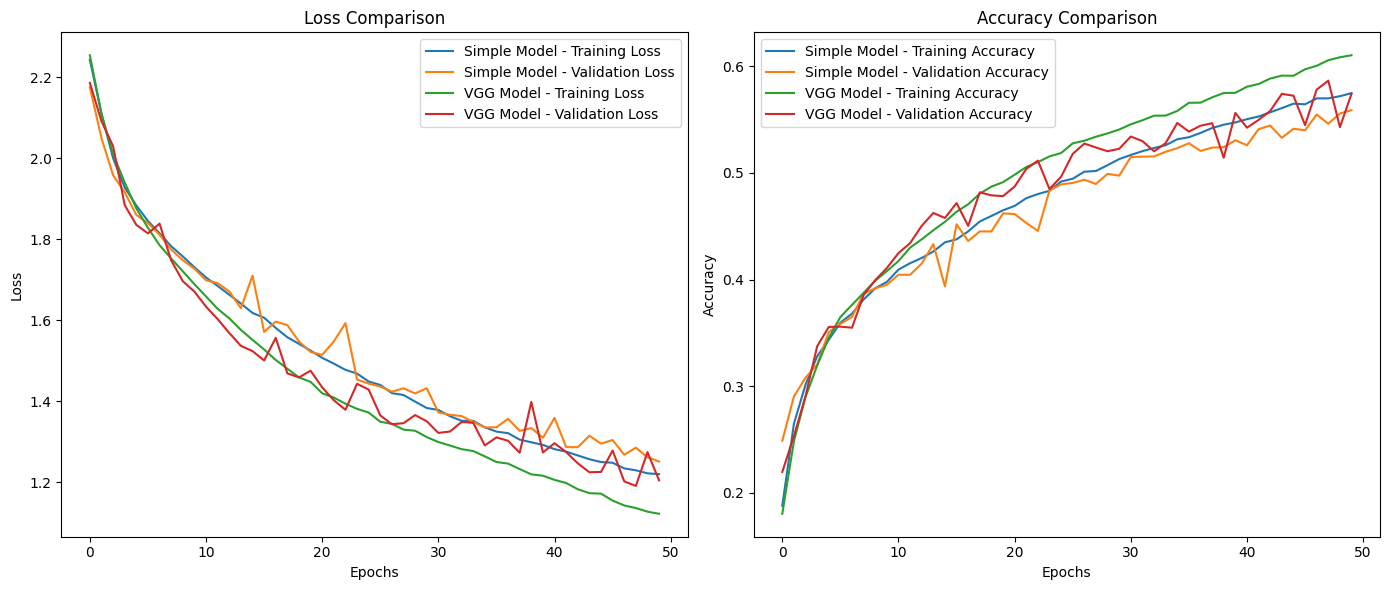

In [21]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the simple model
simple_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the simple model
simple_model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the simple model and capture the history
history_simple = simple_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=512)

# Define the VGG-like model
vgg_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the VGG model
vgg_model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the VGG model and capture the history
history_vgg = vgg_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=512)

# Plot training and validation loss/accuracy for both models
plt.figure(figsize=(14, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history_simple.history['loss'], label='Simple Model - Training Loss')
plt.plot(history_simple.history['val_loss'], label='Simple Model - Validation Loss')
plt.plot(history_vgg.history['loss'], label='VGG Model - Training Loss')
plt.plot(history_vgg.history['val_loss'], label='VGG Model - Validation Loss')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_simple.history['accuracy'], label='Simple Model - Training Accuracy')
plt.plot(history_simple.history['val_accuracy'], label='Simple Model - Validation Accuracy')
plt.plot(history_vgg.history['accuracy'], label='VGG Model - Training Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='VGG Model - Validation Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**Comment on the observation**

Loss Comparison:

Training vs. Validation Loss:
The first subplot is displaying the training and validation loss curves for both the simple model and the VGG-like model over the training epochs.
As both the training and validation loss decrease, it shows that the model is learning well on both datasets.
Accuracy Comparison:
The second subplot shows the training and validation accuracy for both models. As both accuracies increase, the model is learning effectively. 



*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


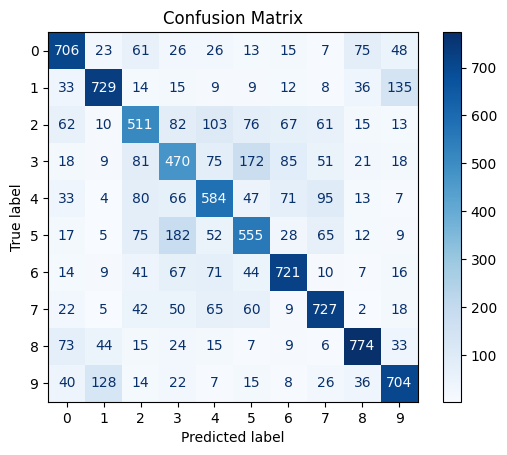

In [24]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.datasets import cifar10

# Assuming the model has been trained and is named 'model'

# Load CIFAR-10 dataset again (test split)
(_, _), (x_test, y_test) = cifar10.load_data()

# Normalize the test data
x_test = x_test.astype('float32') / 255.0

# Make predictions on the test set
y_pred = model.predict(x_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert y_test to 1D array
y_test = y_test.flatten()

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Visualizing the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


**Explanation:
model.predict(): This function is used to predict the output probabilities for the test data. The output is a probability distribution across 10 classes for each test sample.
np.argmax(): After predicting, we use np.argmax() to convert the predicted probabilities into class labels by selecting the class with the highest probability.
Confusion Matrix: We compute the confusion matrix using confusion_matrix() from scikit-learn, which compares the true labels (y_test) with the predicted labels (y_pred_classes).
Visualization: We then visualize the confusion matrix using ConfusionMatrixDisplay, which gives a clear graphical representation of how well the model predicted each class.
Comments on Class Confusions:
The confusion matrix shows the number of correct predictions (diagonal elements) and misclassifications (off-diagonal elements).
High values along the diagonal indicate good performance, while significant values in the off-diagonal cells show where the model is confusing one class with another.
For example, if the model is often confusing cats with dogs, you will see higher off-diagonal values in those class positions, indicating a need for better feature extraction for distinguishing similar classes.

*    Print the test accuracy for the trained model.

In [27]:
from tensorflow.keras.utils import to_categorical

# Convert y_test to one-hot encoded format
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Evaluate the model on the test set
loss, accuracy = simple_model.evaluate(x_test, y_test_one_hot, verbose=2)

# Print the test accuracy
print(f'Test Accuracy: {accuracy * 100:.2f}%')



313/313 - 1s - 4ms/step - accuracy: 0.5588 - loss: 1.2513
Test Accuracy: 55.88%


#Explanation:

to_categorical(y_test, num_classes=10) converts your labels (which are integers representing classes) into one-hot vectors, which is the format required by the categorical cross-entropy loss.
This ensures that both the target and output have the same rank ((None, 10)), solving the error.

## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [28]:
from keras.backend import clear_session
clear_session()

from tensorflow.keras import layers, models

# Define the VGG-like model architecture
def build_vgg_model(input_shape=(64, 64, 3), num_classes=10):
    model = models.Sequential()

    # Block 1: Two convolutional layers with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Block 2: Two convolutional layers with 128 filters
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Block 3: Two convolutional layers with 256 filters
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # Dense layer with 128 units
    model.add(layers.Dense(128, activation='relu'))

    # Output layer with softmax for classification
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Build and compile the model
vgg_model = build_vgg_model()

vgg_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Summary of the model
vgg_model.summary()


C:\Users\mktmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

Explanation:
clear_session(): This call ensures any previous session state is cleared before creating the model. It’s helpful when running multiple models to avoid memory leaks.
Input Shape: (64, 64, 3) as required.
Stacking Layers: Two convolutional layers followed by a max-pooling layer for each block.
Dense Layer: A fully connected dense layer of 128 units.
Softmax Output: The final layer for multi-class classification.
This code defines and compiles the VGG architecture with all the specified configurations. 

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

C:\Users\mktmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.1495 - loss: 2.2820 - val_accuracy: 0.2426 - val_loss: 2.0591
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.2902 - loss: 1.9605 - val_accuracy: 0.3685 - val_loss: 1.7707
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.3865 - loss: 1.7116 - val_accuracy: 0.4567 - val_loss: 1.5220
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.4547 - loss: 1.5091 - val_accuracy: 0.5075 - val_loss: 1.3942
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.5060 - loss: 1.3889 - val_accuracy: 0.5261 - val_loss: 1.3416
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.5418 - loss: 1.2937 - val_accuracy: 0.5406 - val_loss: 1.2870
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.5725 - loss: 1.2169 - val_accuracy: 0.5409 - val_loss: 1.2862
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.6025 - loss: 1.1313 - val_accuracy: 0.5840 - v

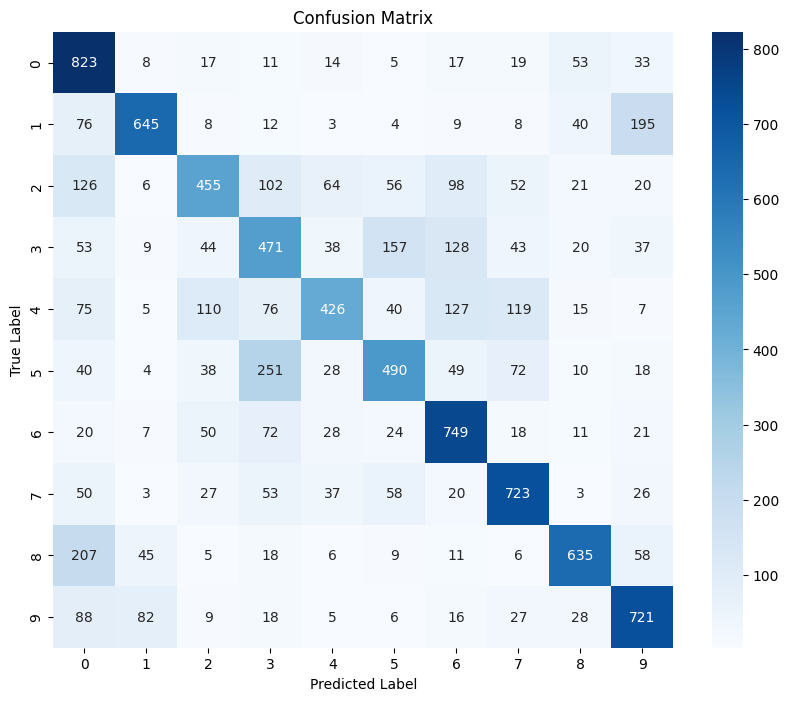

Confusions in class prediction can be observed where the confusion matrix shows non-diagonal values, indicating misclassifications between classes.


In [29]:
from keras.backend import clear_session
clear_session()

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the VGG-like model architecture
def build_vgg_model(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential()

    # Block 1: Two convolutional layers with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Block 2: Two convolutional layers with 128 filters
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Block 3: Two convolutional layers with 256 filters
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # Dense layer with 128 units
    model.add(layers.Dense(128, activation='relu'))

    # Output layer with softmax for classification
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Build the model
vgg_model = build_vgg_model()

# Compile the model
vgg_model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model for 10 epochs
history = vgg_model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))

# Evaluate the model on the test data
test_loss, test_acc = vgg_model.evaluate(x_test, y_test, verbose=2)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Predict the test set
y_pred = np.argmax(vgg_model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Comment on class confusions
print(f"Confusions in class prediction can be observed where the confusion matrix shows non-diagonal values, indicating misclassifications between classes.")


Explanation:
Model Compilation:
Loss: categorical_crossentropy for multi-class classification.
Optimizer: SGD with momentum.
Metric: accuracy.
Training:
Trains the model on CIFAR-10 for 10 epochs with a batch size of 512.
Confusion Matrix:
After predicting the test set, a confusion matrix is plotted using seaborn. This matrix helps visualize misclassifications.
Comment:
We can interpret the confusion matrix by looking at non-diagonal values, which indicate where the model confused between different classes.

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

Activation functions introduce non-linearity into neural networks, allowing them to model more complex patterns. Without activation functions, the network would behave like a linear regression model, limiting its ability to solve complex tasks. Activation functions help the network learn complex relationships between inputs and outputs by introducing non-linearities between layers of neurons .


2 - Key Differences between sigmoid and softmax:

Sigmoid Activation: Sigmoid squashes the output of a neuron into a range between 0 and 1, which is useful for binary classification tasks. Each output is treated independently and interpreted as a probability of class membership.
Softmax Activation: Softmax is typically used for multi-class classification tasks. It turns the raw output into a probability distribution across multiple classes, where the sum of all probabilities is 1 .


3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Binary Crossentropy: Used for binary classification problems, it calculates the difference between the true label and the predicted probability for a single class (0 or 1).
Categorical Crossentropy: Used for multi-class classification. It computes the difference between the one-hot encoded true label and the predicted probability distribution over multiple classes .
